# Trabalho 1 - Introdução a Inteligência Artificial

## Busca

Neste trabalho, nos foi fornecido um grafo com informações de rotas na cidade, e nos foi pedido para fazer uma travessia partindo de Arad até Bucharest.


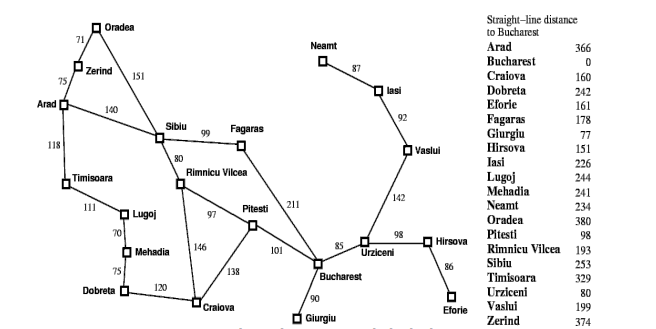



# Setup

Primeiramente, vamos montar com base na imagem e nos dados fornecidos por ela, o grafo. Vamos também criar uma estrutura de fila de prioridade para nos auxiliar a trabalhar neste problema.

In [ ]:
# Dado o problema, defino os pontos de origem e destino da minha busca
start_point = "Oradea"
end_point = "Bucharest"

In [ ]:
# Monto o grafo bidirecionado usando lista de adjacência com os caminhos diretos e custos deles entre duas cidades
graph = {
    "Arad": [("Zerind", 75), ("Sibiu", 140), ("Timisoara", 118)],
    "Zerind": [("Arad", 75), ("Oradea", 71)],
    "Oradea": [("Zerind", 71), ("Sibiu", 151)],
    "Sibiu": [("Arad", 140), ("Oradea", 151), ("Fagaras", 99), ("Rimnicu Vilcea", 80)],
    "Fagaras": [("Sibiu", 99), ("Bucharest", 211)],
    "Rimnicu Vilcea": [("Sibiu", 80), ("Pitesti", 97), ("Craiova", 146)],
    "Pitesti": [("Rimnicu Vilcea", 97), ("Bucharest", 101), ("Craiova", 138)],
    "Timisoara": [("Arad", 118), ("Lugoj", 111)],
    "Lugoj": [("Timisoara", 111), ("Mehadia", 70)],
    "Mehadia": [("Lugoj", 70), ("Drobeta", 75)],
    "Drobeta": [("Mehadia", 75), ("Craiova", 120)],
    "Craiova": [("Drobeta", 120), ("Rimnicu Vilcea", 146), ("Pitesti", 138)],
    "Bucharest": [("Fagaras", 211), ("Pitesti", 101), ("Giurgiu", 90), ("Urziceni", 85)],
    "Giurgiu": [("Bucharest", 90)],
    "Urziceni": [("Bucharest", 85), ("Hirsova", 98), ("Vaslui", 142)],
    "Hirsova": [("Urziceni", 98), ("Eforie", 86)],
    "Eforie": [("Hirsova", 86)],
    "Vaslui": [("Urziceni", 142), ("Iasi", 92)],
    "Iasi": [("Vaslui", 92), ("Neamt", 87)],
    "Neamt": [("Iasi", 87)]
}


# Monto a tabela com os valores heuristicos informados na questão (valores que, neste caso, representam a distância euclidiana de um ponto até o destino)
heuristic = {
    "Arad": 366,
    "Bucharest": 0,
    "Craiova": 160,
    "Drobeta": 242,
    "Eforie": 161,
    "Fagaras": 178,
    "Giurgiu": 77,
    "Hirsova": 151,
    "Iasi": 226,
    "Lugoj": 244,
    "Mehadia": 241,
    "Neamt": 234,
    "Oradea": 380,
    "Pitesti": 98,
    "Rimnicu Vilcea": 193,
    "Sibiu": 253,
    "Timisoara": 329,
    "Urziceni": 80,
    "Vaslui": 199,
    "Zerind": 374
}



In [ ]:
# Crio a minha fila de prioridades
# Ela ordena dinamicamente em ordem crescente de custo a cada inserção ou remoção de informação
from heapq import heappop, heappush

class PriorityQueue():
    def __init__(self):
        self.heap = []

    def push(self, k):
        heappush(self.heap, k)

    def pop(self):
        return heappop(self.heap)

    def empty(self):
        return (len(self.heap) == 0)


# Busca por custo uniforme - (Uniform-Cost search)

In [ ]:
pq = PriorityQueue()

pq.push((0, start_point, None))
vis = dict()
while (not pq.empty()):
  (dist, node, parent) = pq.pop()

  print(f"Distance to {node} is {dist}")
  if(node == end_point):
    break
  vis[node] = False
  for (neighbor, c) in graph[node]:
    if(neighbor in vis): continue
    pq.push((c + dist, neighbor, node))


Distance to Oradea is 0
Distance to Zerind is 71
Distance to Arad is 146
Distance to Sibiu is 151
Distance to Rimnicu Vilcea is 231
Distance to Fagaras is 250
Distance to Timisoara is 264
Distance to Sibiu is 286
Distance to Pitesti is 328
Distance to Lugoj is 375
Distance to Craiova is 377
Distance to Bucharest is 429


In [ ]:
pq = PriorityQueue()

pq.push((start_point, 0))
vis = dict()
dist = { x: float("inf") for x in graph.keys() }
dist[start_point] = 0
while (not pq.empty()):
  (node, d) = pq.pop()

  for (neighbor, c) in graph[node]:
    if (dist[neighbor] > c+ d):
      dist[neighbor] = c+d
      pq.push((neighbor, dist[neighbor]))


print(f"Distance to {end_point} is {dist[end_point]}")

Distance to Bucharest is 429


# Busca Gulosa - (Greedy Search)

In [ ]:
pq = PriorityQueue()

pq.push((heuristic[start_point], start_point))
vis = dict()
while not pq.empty():
  (d, node) = pq.pop()
  print(f"Current node: {node} ")

  if(node == end_point): break

  for (neighbor, _) in graph[node]:
    pq.push((heuristic[neighbor], neighbor))

Current node: Oradea 
Current node: Sibiu 
Current node: Fagaras 
Current node: Bucharest 


# Busca A* - (A* Search)

In [ ]:
pq = PriorityQueue()

pq.push((heuristic[start_point] + 0, start_point))

while not pq.empty():
  (d, node) = pq.pop()
  print(f"Current node: {node} | Distance traveled: {d - heuristic[node]} | Heristic distance to destination: {heuristic[node]} | f= {d}")

  if(node == end_point): break

  for (neighbor, c) in graph[node]:
    pq.push((heuristic[neighbor] + c + d - heuristic[node], neighbor))

Current node: Oradea | Distance traveled: 0 | Heristic distance to destination: 380 | f= 380
Current node: Sibiu | Distance traveled: 151 | Heristic distance to destination: 253 | f= 404
Current node: Rimnicu Vilcea | Distance traveled: 231 | Heristic distance to destination: 193 | f= 424
Current node: Pitesti | Distance traveled: 328 | Heristic distance to destination: 98 | f= 426
Current node: Fagaras | Distance traveled: 250 | Heristic distance to destination: 178 | f= 428
Current node: Bucharest | Distance traveled: 429 | Heristic distance to destination: 0 | f= 429
